<a href="https://colab.research.google.com/github/ahmadsanafarooq/Data-Science-Machine-Learning-Nodebook/blob/main/Project_1_Chocolate_Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings as wrn
wrn.filterwarnings('ignore')

# **Load Dataset**

In [2]:
df=pd.read_csv("/content/Chocolate Sales.csv")

# **Explore Dataset**

In [3]:
#by default ,the head function shows first 5 values
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [4]:
#by default ,the tail function shows last 5 values
df.tail()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384
1093,Karlen McCaffrey,India,70% Dark Bites,23-May-22,"$5,075",344


In [5]:
#information related to data,what type of data is in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [6]:
#Statistical data
df.describe()

,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


In [7]:
#columns in dataset
df.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')

# **Data Handeling**

In [8]:
#missing values
df.isnull().sum()

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


In [9]:
#duplicate values
df.duplicated().sum()

0

# **Inconsistency**

In [10]:
df['Amount'] = df['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Amount']

,Amount
0,5320.0
1,7896.0
2,4501.0
3,12726.0
4,13685.0
...,...
1089,4410.0
1090,6559.0
1091,574.0
1092,2086.0


# **Feature Engineering**

In [11]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']

,Date
0,2022-01-04
1,2022-08-01
2,2022-07-07
3,2022-04-27
4,2022-02-24
...,...
1089,2022-05-17
1090,2022-06-07
1091,2022-07-26
1092,2022-07-28


In [12]:
#Price of per box
df["Per_box_price"]=df["Amount"]/df["Boxes Shipped"]
df["Per_box_price"]

,Per_box_price
0,29.555556
1,84.000000
2,49.461538
3,37.210526
4,74.375000
...,...
1089,13.653251
1090,55.117647
1091,2.645161
1092,5.432292


In [13]:
#check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
 6   Per_box_price  1094 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 60.0+ KB


# **Exploratory data analysis**

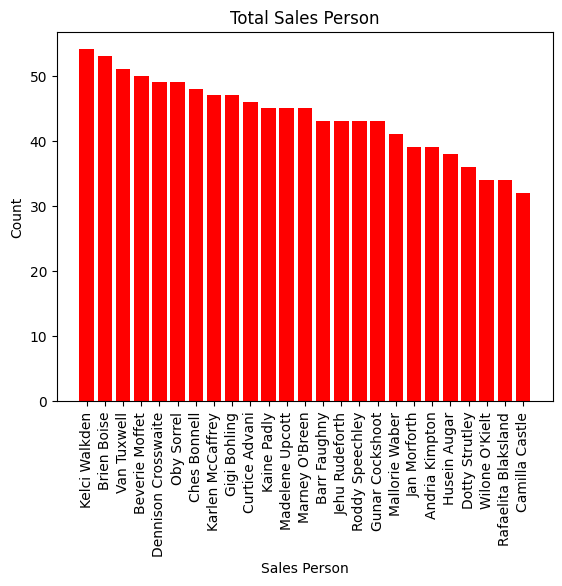

In [14]:
# @title Bar Plot
cout=df['Sales Person'].value_counts()
plt.bar(cout.index, cout.values,color='red')
plt.title('Total Sales Person')
plt.xlabel('Sales Person')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

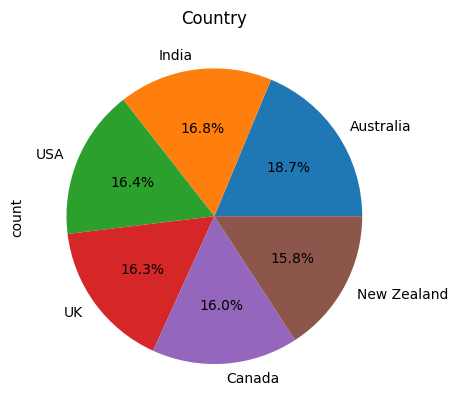

In [15]:
# @title Pie Chart
df.Country.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Country')
plt.show()

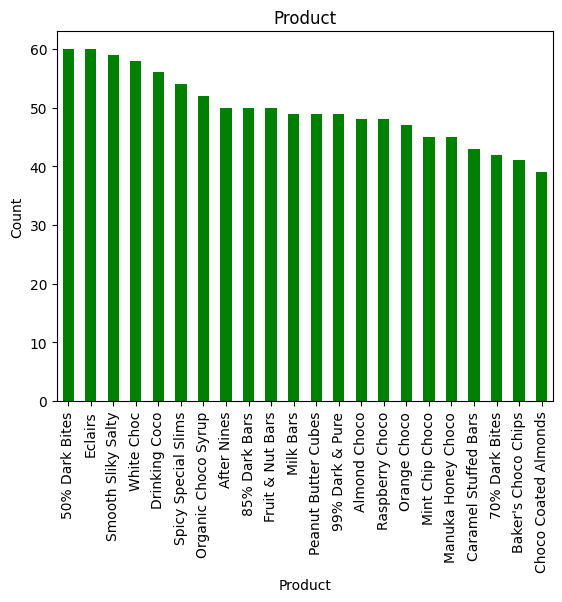

In [16]:
# @title Bar Plot
df.Product.value_counts().plot(kind='bar',color='green')
plt.title('Product')
plt.xlabel("Product")
plt.ylabel("Count")
plt.show()

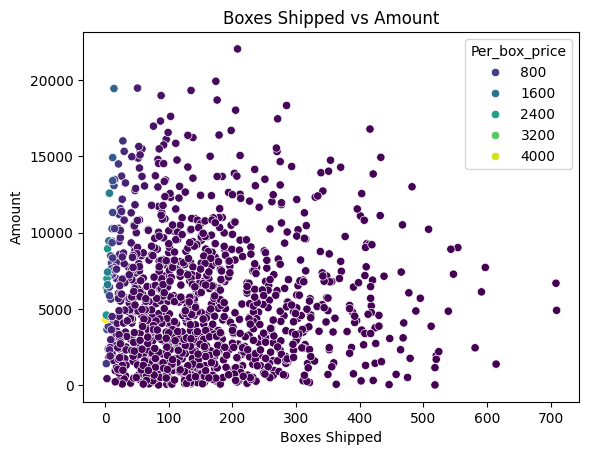

In [17]:
# @title Scatter plot
sns.scatterplot(x='Boxes Shipped',y='Amount',hue='Per_box_price',data=df,palette='viridis')
plt.title('Boxes Shipped vs Amount')
plt.xlabel('Boxes Shipped')
plt.ylabel('Amount')
plt.show()

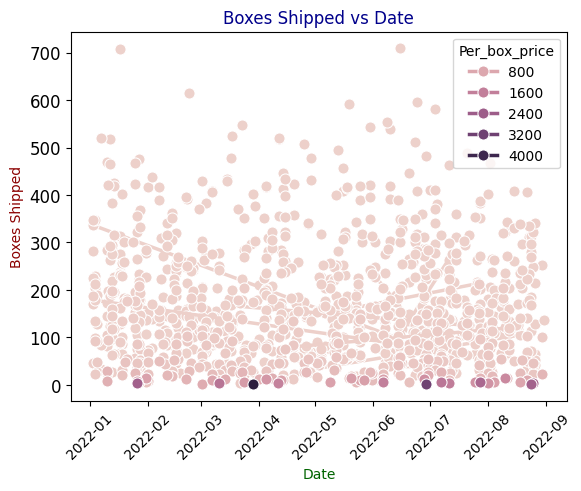

In [18]:
# @title line plot
sns.lineplot(x='Date', y='Boxes Shipped', hue='Per_box_price', data=df, linewidth=2.5, marker="o", markersize=8)
plt.title('Boxes Shipped vs Date',color="darkblue")
plt.xlabel('Date',color="darkgreen")
plt.ylabel('Boxes Shipped',color="darkred")
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.show()

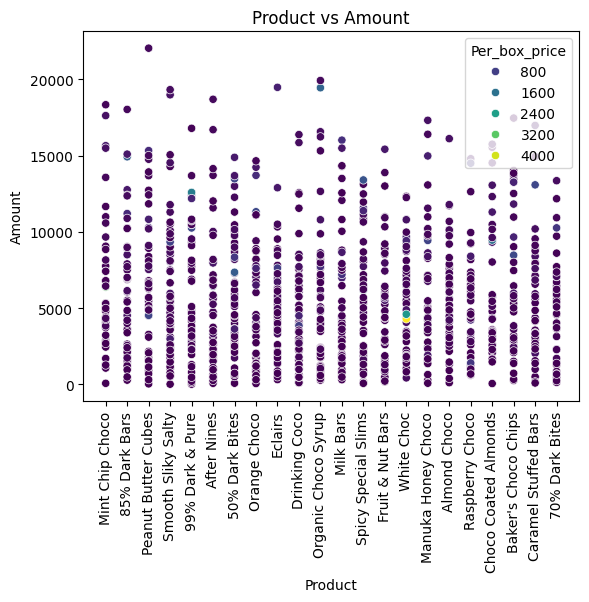

In [19]:
# @title Scatter plot
sns.scatterplot(x='Product',y='Amount',hue='Per_box_price',data=df,palette='viridis')
plt.title('Product vs Amount')
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.ylabel('Amount')
plt.show()

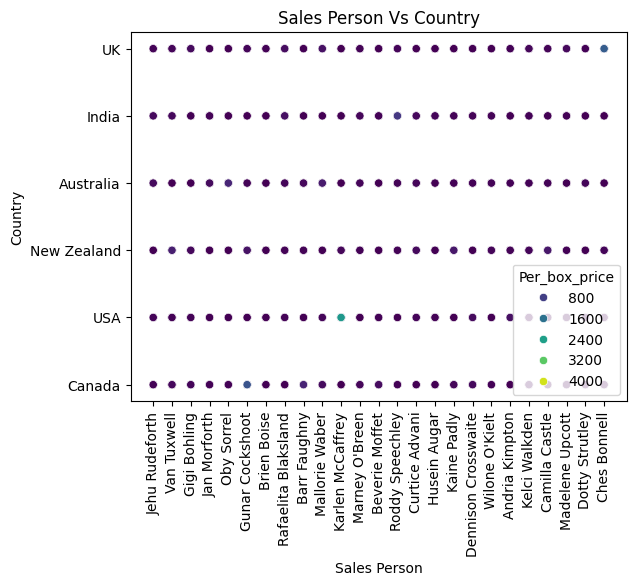

In [20]:
# @title Scatter Plot
sns.scatterplot(x='Sales Person',y='Country',hue='Per_box_price',data=df,palette='viridis')
plt.title('Sales Person Vs Country')
plt.xlabel('Sales Person')
plt.xticks(rotation=90)
plt.ylabel('Country')
plt.show()

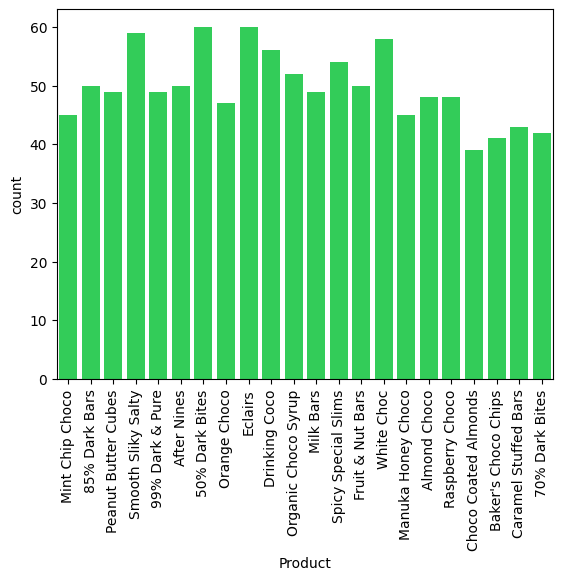

In [21]:
#  @title Count Plot
sns.countplot(x=df['Product'],color=(0.1, 0.9, 0.3))
plt.xlabel("Product")
plt.xticks(rotation=90)
plt.show()

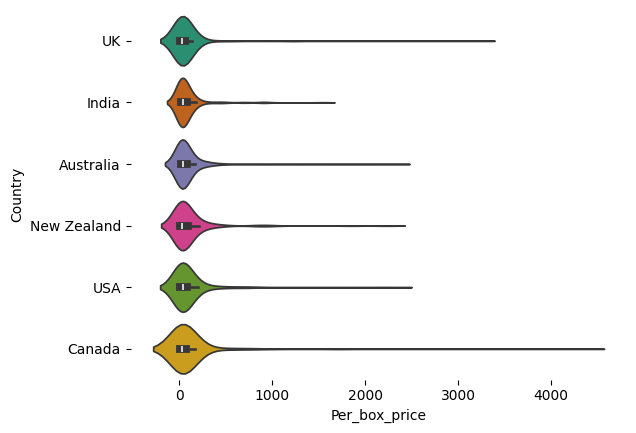

In [22]:
# @title Violin Plot
sns.violinplot(df, x='Per_box_price', y='Country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

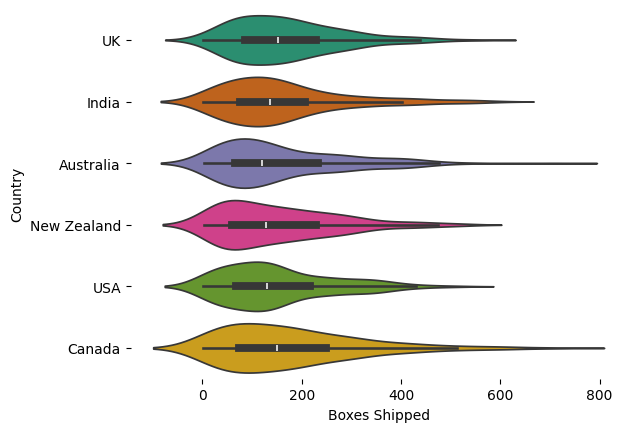

In [23]:
# @title Violin Plot
sns.violinplot(df, x='Boxes Shipped', y='Country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

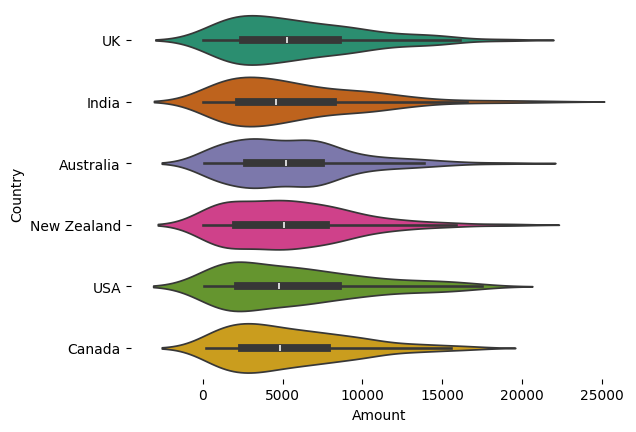

In [24]:
# @title Violin Plot
sns.violinplot(df, x='Amount', y='Country', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)